<div
    style='background-image: url("FIGURES/TU_Delft_logo.png"); padding: 0px;
    background-size: 25%; border-radius: 0px; height: 165px;
    background-repeat: no-repeat; background-position: right bottom'>
    <div
    style="float: left; margin: 0px; padding: 0px;
    background: rgba(255 , 255 , 255 , 0.0); width: 100%; height: 180px;
    border-radius: 10px">
    <div
        style="position: relative; top: 50%;
        transform: translatey(-50%)">
        <div
            style="font-size: xx-large; font-weight: 900; color: rgba(0 , 0 , 0 , 1.0); line-height: 100%">
            Arbitrary plane waves 
        </div>
        <div
            style="font-size: x-large; padding-top: 40px; color: rgba(0 , 0 , 0 , 1.0)">
        <p>Jupyter notebook explanation
        </div>
        <div
            style="font-size: large; padding-top: 20px; color: rgba(0 , 0 , 0 , 1.0)">
            Physics for Geosystem (AESM1325) -- MSc GeoEnergy Engineering ($1^{st}$ year)<br> 
            <em>Cornelis Weemstra</em>, CEG, TU Delft
        </div>
   </div>

</div>


# Plane waves

By considering so-called *plane waves*, details of the seismic source are avoided. The assumption of an incident plane wave may be quite good in practice for investigating waves at great distances from their source (Figure 1).
<br>     
<figure>
  <img src="./FIGURES/plane_vs_non_plane_wave.png"  width=50%>
  <figcaption><br>Figure 1: <i>(a) If the point P on some boundary within the Earth is sufficiently far from the localized source of waves under study, then wavefronts arriving at P may effectively be treated as incoming plane waves. (b) If Q is sufficiently close to the source, then curvature of the wavefronts at Q may have to be taken into account. Note that by "sufficiently far" and "sufficiently close" we refer to the number of wavelengths between the point of interest (P or Q) and the source. Thus, even for the source receiver geometry in (b), it may be possible to use plane wave theory for the very high frequencies (adopted from Aki & Richards, 2002).</i></figcaption>
</figure><br>

A physical quantity (e.g., particle displacement or a stress component) propagates as a plane wave in direction $\mathbf{l}$ with speed $c$ if 
<ol>
    <li>at a fixed time, the quantity is spatially unchanged over each plane normal to the vector $\mathbf{l}$, and if</li>
	<li>the plane associated with a particular value of the quantity moves with speed $c$ in direction $\mathbf{l}$.</li>
</ol>
Physical quantities propagating with these two properties must have a functional dependence on space and time via the combination $t -\left(\hat{\mathbf{l}} \cdot \mathbf{x} \right)/c$. We call $\hat{\mathbf{l}}/c$ the *slowness vector*, which we denote by $\mathbf{s}$ (i.e., $\mathbf{s} \equiv \hat{\mathbf{l}}/c$). An advantage of using slowness (rather than velocity) to summarize the speed and direction of propagation of a wave is that slownesses may be added vectorially (but velocities, in this context, may not). The slowness of a given wave is hence the vectorial sum of its components $s_1$, $s_2$, and $s_3$ along each coordinate direction: $\mathbf{s} = s_1 \hat{\mathbf{x}}_1 +  s_2 \hat{\mathbf{x}}_2 + s_3 \hat{\mathbf{x}}_3$ and the slowness in direction $\mathbf{n}$ is simply $\mathbf{s} \cdot \mathbf{n}$. 

Because this explanation is generally found to be rather abstract, you can below plot a plane wave in 2D space as a function of time and slowness. This will make this theory a bit more hands-on. Two example "wavelets" are implemented. A simple cosine and the widely used Ricker wavelet. There is no need to understand the details of the Ricker wavelet, as it just serves to exemplify the behavior of a plane wave. 



**References**

Aki, K., & Richards, P. G. (2002). Quantitative Seismology (second edition). Sausalito, California: University Science Books.


# Start of the code

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math 

## Parameters

In [14]:
##### PARAMETERS IN THE ARGUMENT OF THE PLANE WAVE (t-s·x)
# Velocity (m/s)
c = 1000. 
# angle indicating direction of propagation of the plane wave with respect to North
azi = 95     
# Time (seconds)
t=0.1


##### GENERAL AND DERIVED PARAMETERS 

# time sampling (seconds)
dt= 0.002       
# Frequency (or Central frequency) (Hz)
f = 10
# samples per wavelenght
spwl = 50
# space sampling (meters)
dx = c/f/spwl

## Source wavelets (functions)

In [15]:
def ricker(f, t):
    y = (1.-2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return y

def cos(f, t):
    y = math.cos(2*np.pi*f*t)
    return y


## Plot a source wavelet

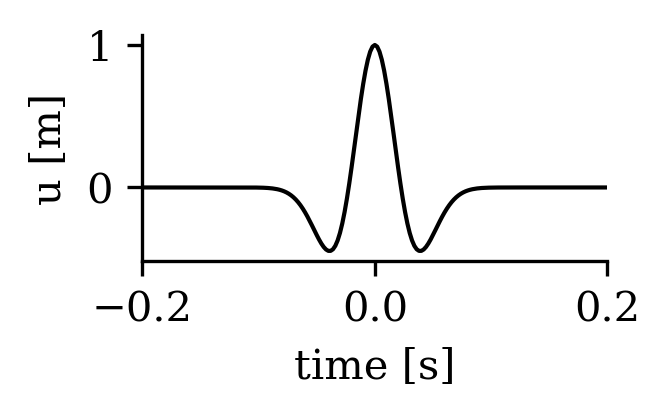

In [16]:
t_vec = np.linspace(-2*(1/f), 2*(1/f), np.int64(4*(1/f)/dt)+1)
u_vec = np.zeros(np.int64(4*(1/f)/dt)+1)

for i in range(len(t_vec)):
    u_vec[i]=ricker(f,t_vec[i])
    
    
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=[2,1.0],dpi = 300,constrained_layout=False)
gs  = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0,0])
ax1.set_xlim(-2*(1/f),2*(1/f))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('u [m]')
plt.plot(t_vec,u_vec,'-',linewidth=1,color='black')

plt.show()  
    

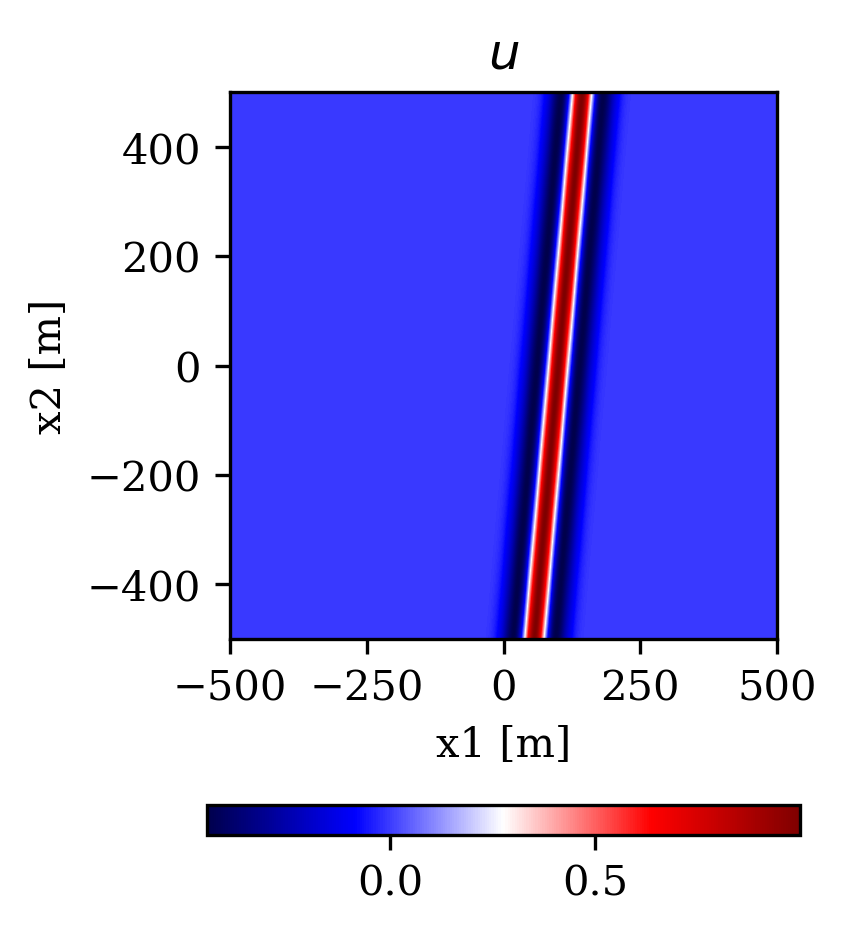

In [18]:
# Computation of 2D slowness vector
s=[math.sin(math.radians(azi))/c,math.cos(math.radians(azi))/c]
#print(s[0],s[1])


# Compute wavefield as function of t, s1, and s2  (t-s·x)
# being time, slowness component 1, and slowness component 2, respectively
x_vec = np.linspace(-5*spwl*dx, 5*spwl*dx, 10*spwl + 1)
u_arr = np.zeros((np.int64(10*spwl+1) , np.int64(10*spwl+1))) 

for i in range(len(x_vec)):
    dum = t - x_vec[i]*s[0]
    for j in range(len(x_vec)):
        u_arr[j,i] = ricker(f,dum-x_vec[j]*s[1])
        #print(i,j,x_vec[i],x_vec[j],u_arr[i,j])


# Plotting
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 10
plt.figure(figsize=[3,3],dpi = 300,constrained_layout=True)
plt.imshow(u_arr,cmap="seismic",origin='lower',extent=[-5*spwl*dx,5*spwl*dx,-5*spwl*dx,5*spwl*dx])
plt.colorbar(shrink=0.75,orientation = 'horizontal')
plt.xlabel('x1 [m]')
plt.ylabel('x2 [m]')
plt.title('$u$')
plt.show()

## Attempt to introduce a slider (not finished yet). Feel free to try... ;)


(501,)


TypeError: Invalid shape (501,) for image data

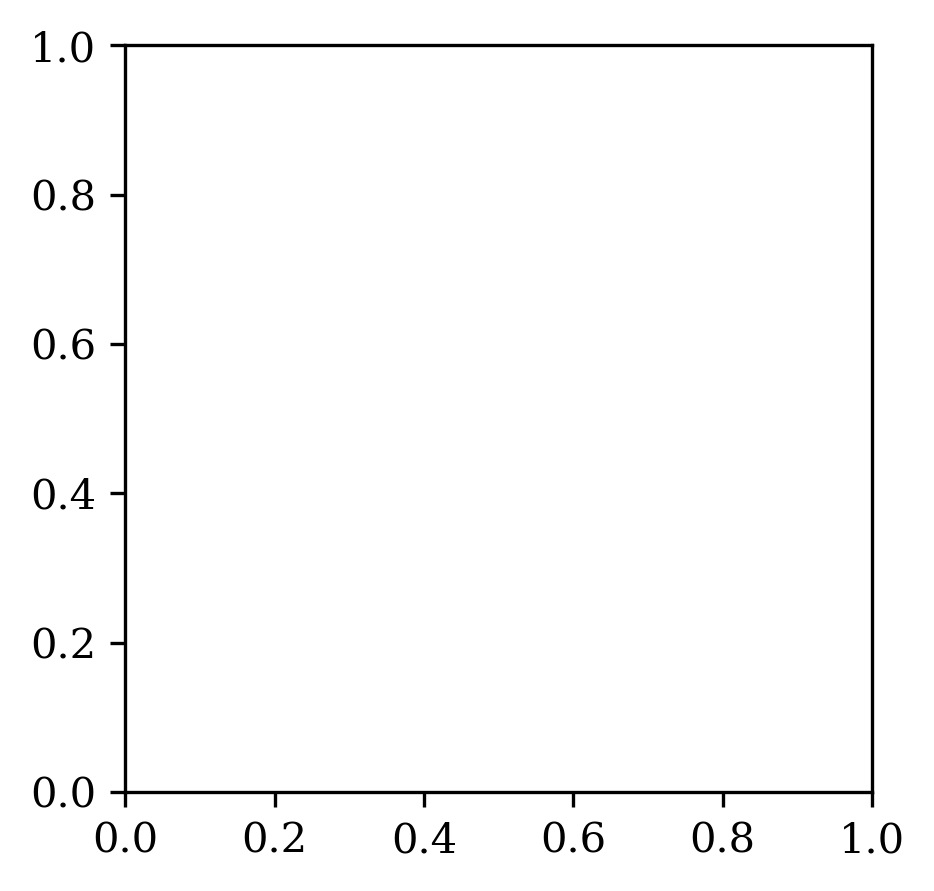

In [38]:
from matplotlib.widgets import Slider, Button, RadioButtons


# Compute argument as function of t, s1, and s2 
# (being time, slowness component 1, and slowness component 2, respectively)
x_vec = np.linspace(-5*spwl*dx, 5*spwl*dx, 10*spwl + 1)
x_vec2 = np.linspace(-5*spwl*dx, 5*spwl*dx, 10*spwl + 1)
u_arr = np.zeros((np.int64(10*spwl+1) , np.int64(10*spwl+1)))  # number of time samples by 10 by 10 wavelengths

# # Computation of t-s·x
# for i in range(len(x_vec)):
#     dum = t - x_vec[i]*s[0]
#     for j in range(len(x_vec)):
#         u_arr[i,j] = ricker(f,dum-x_vec[j]*s[1])
#         #print(i,j,x_vec[i],x_vec[j],u_arr[i,j])

u_arr = np.zeros((np.int64(10*spwl+1) , np.int64(10*spwl+1)))
u_arr = ricker(f,t-x_vec*s[0]-x_vec2*s[1])
# u_arr = np.zeros(np.int64(10*spwl+1))
# u_arr = ricker(f,t-x_vec*s[0])
print(u_arr.shape)


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 10
plt.figure(figsize=[3,3],dpi = 300,constrained_layout=True)
plt.imshow(u_arr,cmap="seismic",origin='lower',extent=[-5*spwl*dx,5*spwl*dx,-5*spwl*dx,5*spwl*dx])
plt.colorbar(shrink=0.75,orientation = 'horizontal')
plt.xlabel('x1 [m]')
plt.ylabel('x2 [m]')
plt.title('$u$')
plt.show()

 
sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)



